In [41]:
import os
import numpy as np
import logging
import matplotlib.pyplot as plt
from aperiodic_codes.cut_and_project.z2 import row_echelon, rank, nullspace
from aperiodic_codes.cut_and_project.code_param_utils import compute_lz
from aperiodic_codes.cut_and_project.config import tests
from ortho import visualize_logical
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)
logging.basicConfig(level=logging.INFO, format='%(message)s')
%matplotlib widget

In [43]:
data_path = "../../data/apc/6d_to_3d"
pid = "20241003_n=3_DIRS27_2"  # high n_low, 0 n_anti
filepath = os.path.join(data_path, f'{pid}.npz')
data = np.load(filepath)

proj_pts = data['proj_pts']
cut_bulk = data['cut_bulk']
n_points = proj_pts.shape[0]
logging.info(f'number of points = {n_points}')

new_hx_cc = data['hx_cc']
new_hx_vv = data['hx_vv']
new_hz_cc = data['hz_cc']
new_hz_vv = data['hz_vv']
new_hx = np.hstack((new_hx_cc, new_hx_vv)).astype(np.int64)
new_hz = np.hstack((new_hz_cc, new_hz_vv)).astype(np.int64)
logging.info(f'min weight of stab(Hx) = {np.min(np.sum(new_hx, axis=1))}')
logging.info(f'min weight of stab(Hz) = {np.min(np.sum(new_hz, axis=1))}')
logging.info(f'rank(Hx) = {rank(new_hx)}')
logging.info(f'rank(Hz) = {rank(new_hz)}')
ns_x = nullspace(new_hx)
ns_z = nullspace(new_hz)
logging.info(f'min weight of ker(Hx) = {np.min(np.sum(ns_x, axis=1))}')
logging.info(f'min weight of ker(Hz) = {np.min(np.sum(ns_z, axis=1))}')
np.save('ns_x.npy', ns_x)
np.save('ns_z.npy', ns_z)

number of points = 2405
min weight of stab(Hx) = 2
min weight of stab(Hz) = 2
rank(Hx) = 2405
rank(Hz) = 2405
min weight of ker(Hx) = 2
min weight of ker(Hz) = 2


In [50]:
cnt = 0
ind_del_x = 0
ind_del_z = 0
for i in range(len(new_hx)):
    for j in range(len(new_hz)):
        if np.sum((new_hx[i] @ new_hz[j]) % 2) % 2 == 1:
            cnt += 1
            print(f'[{i}, {j}]')
            ind_del_x = i
            ind_del_z = j
assert cnt == 1
print(f'cnt = {cnt}')

[1365, 945]
cnt = 1


In [51]:
new_new_hx = new_hx.copy()
new_new_hx[ind_del_x] = 0

new_new_hz = new_hz.copy()
new_new_hz[ind_del_z] = 0

In [57]:
lz = compute_lz(new_new_hx, new_hz)
lx = compute_lz(new_hz, new_new_hx)
# lz = compute_lz(new_hx, new_new_hz)
# lx = compute_lz(new_new_hz, new_hx)
k = len(lz)

In [58]:
np.sum(lz[0])

2

In [59]:
np.sum(lx[0])

5

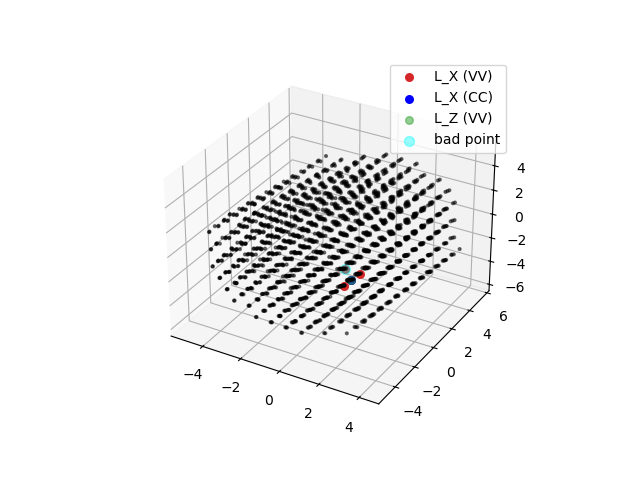

In [60]:
fig, ax = visualize_logical(lx, lz, proj_pts)
ind_del = ind_del_z
ax.scatter(proj_pts[ind_del, 0], proj_pts[ind_del, 1], proj_pts[ind_del, 2], c='cyan', s=50,alpha=0.4, label='bad point')
ax.legend()
plt.show()

In [26]:
new_hx[ind_del_x].nonzero()

(array([ 364,  365, 1867, 1896]),)

In [56]:
new_hz[:,ind_del_z].nonzero()

(array([945]),)

In [61]:
new_hx[:,ind_del_x].nonzero()

(array([1364, 1365]),)